# Lab 2

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 四個求根演算法的實作可以參考[lab-2](https://yuanyuyuan.github.io/itcm/lab-2.html)，裡面有教學影片也有範例程式可以套用。
4. **Deadline: 10/9(Wed.)**

In [1]:
name = "陳彥宇"
student_id = "B05303134"

---

# Exercise 1 - Bisection

### Use the bisection method to find roots of
### $$f(x)=cosh(x)+cos(x)-c \text{, for } c=1, 2, 3,$$

---

### Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### 1. Define a function $g(c)(x)=f(x)=cosh(x)+cos(x)-c$ with parameter $c=1, 2, 3$.

In [3]:
def g(c):
    assert c == 1 or c == 2 or c == 3
    def f(x):
        # Hint: return ...
        # ===== 請實做程式 =====
        return np.cosh(x)+np.cos(x)-c
        # ====================
    return f

Pass the following assertion.

In [4]:
assert g(1)(0) == np.cosh(0) + np.cos(0) - 1

### 2. Implement the algorithm

In [5]:
def bisection(
    func,
    interval,
    max_iterations=5,
    tolerance=1e-7,
    report_history=False,
):
    '''
    Parameters
    ----------
    func : function
        The target function
    interval: list
        The initial interval to search
    max_iterations: int
        One of the termination conditions. The amount of iterations allowed.
    tolerance: float
        One of the termination conditions. Error tolerance.
    report_history: bool
        Whether to return history.

    Returns
    -------
    result: float
        Approximation of the root.
    history: dict
        Return history of the solving process if report_history is True.
    '''

    # ===== 請實做程式 =====
    # Ensure the initial interval is valid
    a, b = interval
    assert func(a) * func(b) < 0, 'This initial interval does not satisfied the prerequisites!'

    num_iterations = 0
    a_next, b_next = a, b

    # history of solving process
    if report_history:
        history = {'estimation': [], 'error': []}

    while True:

        # Find midpoint
        c = (a_next + b_next) / 2

        # Evaluate the error
        error = (b_next - a_next) / 2

        if report_history:
            history['estimation'].append(c)
            history['error'].append(error)

        if error < tolerance:
            print('The approximation has satisfied the tolerance.')
            return (c, history) if report_history else c

        # Check the number of iterations
        if num_iterations < max_iterations:
            num_iterations += 1

            # Halve the interval
            value_of_func_c = func(c)
            if func(a_next) * value_of_func_c < 0:
                a_next = a_next
                b_next = c
            elif value_of_func_c * func(b_next) < 0:
                a_next = c
                b_next = b_next
            else:
                return (c, history) if report_history else c
        else:
            print('Terminate since reached the maximum iterations.')
            return (c, history) if report_history else c
    # ====================

Test your implementation with the assertion below.

In [6]:
root = bisection(lambda x: x**2 - x - 1, [1.0, 2.0], max_iterations=100, tolerance=1e-7, report_history=False)
assert abs(root - ((1 + np.sqrt(5)) / 2)) < 1e-7

The approximation has satisfied the tolerance.


---

### 3. Answer the following questions under the case $c=1$.

### Plot the function to find an interval that contains the zero of $f$ if possible.

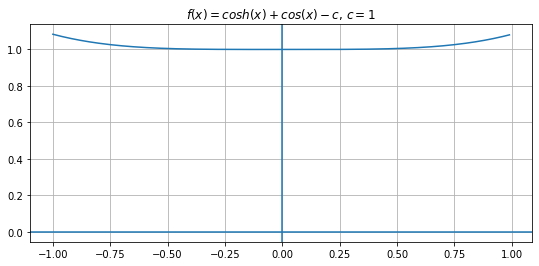

In [7]:
c = 1
f = g(c)

# Hint: search_range = np.arange(左端點, 右端點, 點與點之間距), 
# e.g. search_range = np.arange(0.0, 1.0, 0.01)
# ===== 請實做程式 =====
search_range = np.arange(-1.0, 1.0, 0.01)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [8]:
# Hint: root = ?
# ===== 請實做程式 =====
root = None
# ====================

In [9]:
print('My estimation of root:', root)

My estimation of root: None


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

According to the figure as above showing that the minimal value of the function is strictly greater than $0$, this function does not have zero in real number and thus our method faild to find the zero.

---

### 4. Answer the following questions under the case $c=2$.

### Plot the function to find an interval that contains the zero of $f$ if possible.

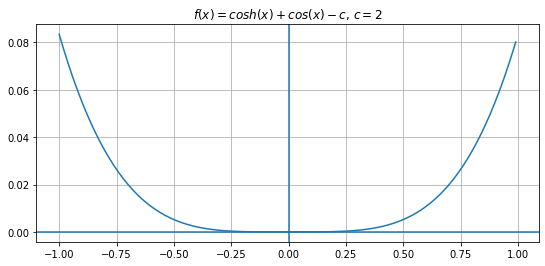

In [10]:
c = 2
f = g(c)

# Hint: search_range = np.arange(左端點, 右端點, 點與點之間距), 
# e.g. search_range = np.arange(0.0, 1.0, 0.01)
# ===== 請實做程式 =====
search_range = np.arange(-1.0,1.0,0.01)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [11]:
# Hint: root = ?
# ===== 請實做程式 =====
root = 0
# ====================

In [12]:
print('My estimation of root:', root)


My estimation of root: 0


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

Although the function has the zero at $x=0$, the bisection method based on the intermediate value theorem required the interval be alternating sign at the end points. However, the value of the function is always greater or equal to $0$, having no such required interval.

---

### 5. Answer the following questions under the case $c=3$.

### Plot the function to find an interval that contains the zeros of $f$ if possible.

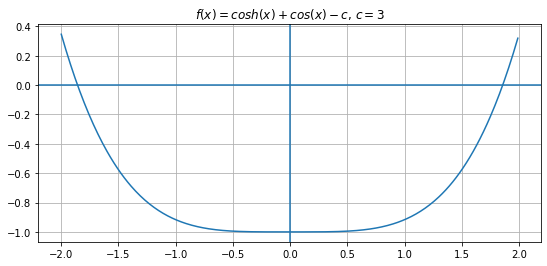

In [13]:
c = 3
f = g(c)

# Hint: search_range = np.arange(左端點, 右端點, 點與點之間距), 
# e.g. search_range = np.arange(0.0, 1.0, 0.01)
# ===== 請實做程式 =====
search_range = np.arange(-2.0,2.0,0.01)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [15]:
# Hint: root = ?
# ===== 請實做程式 =====
root = 1.8579208, -1.8579208
# ====================

In [16]:
print('My estimation of root:', root)


My estimation of root: (1.8579208, -1.8579208)


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

請點此cell兩下開始作答（如要打文字記得選Markdown, 寫程式則選Code, 一個cell不夠可以再新增在下方）

In [24]:
# positive roots
my_initial_interval = [1.0,2.0]

solution, history = bisection(
    f, 
    my_initial_interval,
    max_iterations = 40,
    tolerance=1e-10,
    report_history=True
)

print(solution)

The approximation has satisfied the tolerance.
1.8579208291484974


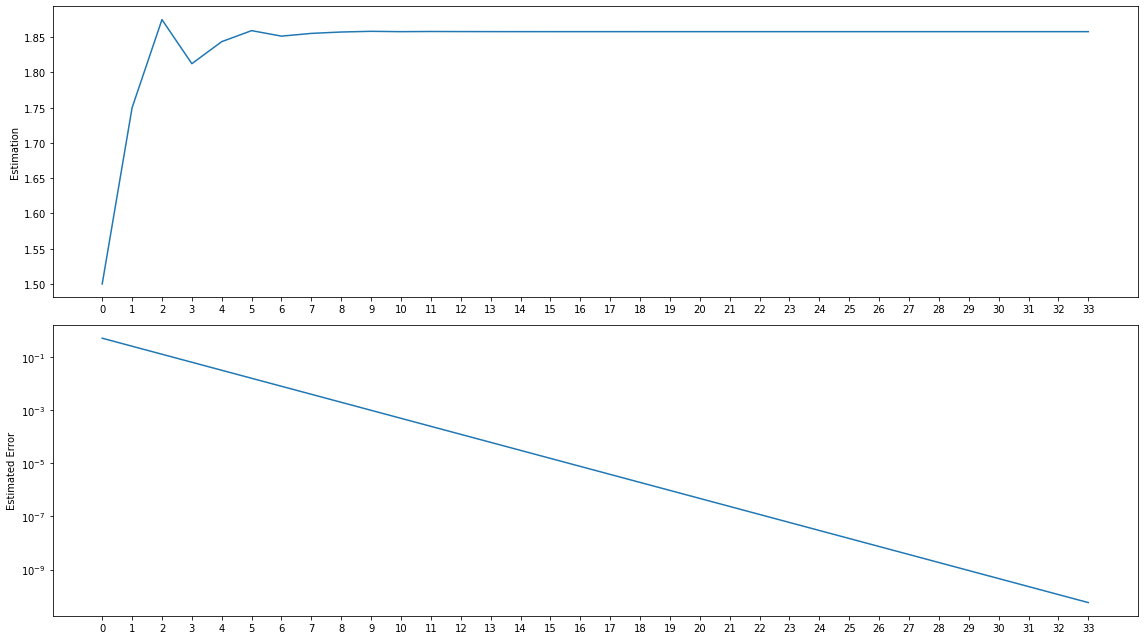

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(16, 9))
ax1, ax2 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

ax2.plot(iterations, history['error'])
ax2.set_ylabel('Estimated Error')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

In [29]:
# negative roots
my_initial_interval = [-2.0,-1.0]

solution, history = bisection(
    f, 
    my_initial_interval,
    max_iterations = 40,
    tolerance=1e-10,
     report_history=True
)

print(solution)

The approximation has satisfied the tolerance.
-1.8579208291484974


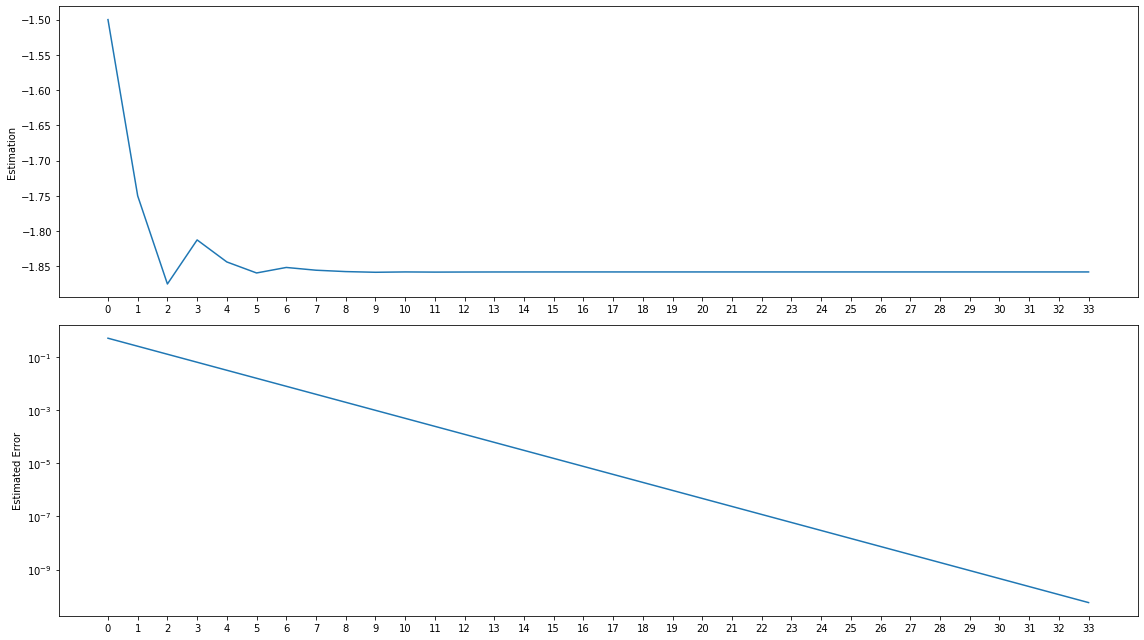

In [30]:
fig, axes = plt.subplots(2, 1, figsize=(16, 9))
ax1, ax2 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

ax2.plot(iterations, history['error'])
ax2.set_ylabel('Estimated Error')
ax2.set_yscale('log')

plt.tight_layout()
plt.show()

---

## Discussion

### For all cases above(c=1,2,3), do the results(e.g. error behaviors, estimations, etc) agree with the theoretical analysis?

For $c$=3, the error behaviors, estimations do agree with the theoretical analysis.

Given the tolerance $\epsilon=10^{-10}$, the minimal iterations $n$ to converge started from the interval $[1, 2]$ or $[-2,-1]$ can be derived by

$$|error| < \frac{|b-a|}{2^{n+1}} \implies 10^{-10} < \frac{2-1}{2^{n+1}} \implies n > \log_2(10^{10})-1 \implies n \geq 33.$$


In [40]:
print(np.abs(history['error'][-1]<1e-10))

True


However, for $c=1,2$, the bisection method does not work since the requirement dose not satisfied.